# **Project Name**    - Banking Risk Analysis

## 🗂️ **Project Summary**  


This analysis examines data from 3,000 banking customers to understand exposure patterns, credit behavior, and risk distribution.

Data Profiling & Cleaning:
Validated 25 attributes, handled missing values, standardized data types, and removed duplicates for accurate aggregation.

Analysis:
Explored key indicators—Credit Card Balance, Bank Loans, and Risk Weighting—across demographics and branches to identify unusual credit utilization.

Risk Segmentation:
Grouped customers into low, medium, and high risk based on Risk Weighting and analyzed exposure concentration in each tier.

Outlier Detection:
Used IQR analysis to detect extreme credit and loan values indicating anomalies or potential fraud.

Correlation & Insights:
Found strong links between higher exposures and elevated risk. Integrated demographic and relationship data to reveal how client profiles affect overall risk and exposure trends.

## ❓ **Problem Statement**  

Analyze the bank's client portfolio data from the provided dataset to identify key risk and exposure drivers across financial products, client demographics, and banking relationships; uncover age-related trends, nationality-based patterns, and high-risk outliers in risk weightings; and align client profiles against loyalty classifications and fee structures. Use these insights to optimize lending strategies, credit risk mitigation, and client segmentation for enhanced financial stability and reduced portfolio concentration risk.

## 🎯 **Objective**

Deliver actionable insights from the bank's client portfolio data to:

*   Identify high-risk financial
products, client demographics, and banking relationships driving overall exposure and risk weightings

*   Uncover age-based trends, nationality patterns, and anomalies in client behaviors for proactive monitoring

*   Spot credit and lending risks from outliers in balances, loans, deposits, and income estimates
*   Inform lending policies, fee structures, loyalty programs, and demographic segmentation strategies

These findings will guide the design of a Power BI dashboard to support strategic risk management and enhanced portfolio stability.

# **📥 Setup & Configuration**

In [1]:
# 📘 1. IMPORT LIBRARIES

# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Configure notebook display
%matplotlib inline
sns.set_style("whitegrid")    # clean seaborn style
plt.rcParams['figure.figsize'] = (10, 6)   # default fig size

# **🔄 Data Ingestion**

In [7]:
# Read the data

df = pd.read_excel('/content/Banking_data.xlsx')
df.head(5)

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,2010-01-25,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,2019-03-28,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,2012-07-20,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5


# **🔍 Data Profiling / Initial Inspection**

In [9]:
# Check the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Get a concise summary of the DataFrame
print("\nDataFrame Info:")
df.info()

Shape of the DataFrame: (3000, 25)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Client ID                 3000 non-null   object        
 1   Name                      3000 non-null   object        
 2   Age                       3000 non-null   int64         
 3   Location ID               3000 non-null   int64         
 4   Joined Bank               3000 non-null   datetime64[ns]
 5   Banking Contact           3000 non-null   object        
 6   Nationality               3000 non-null   object        
 7   Occupation                3000 non-null   object        
 8   Fee Structure             3000 non-null   object        
 9   Loyalty Classification    3000 non-null   object        
 10  Estimated Income          3000 non-null   float64       
 11  Superannuation Savings    3000

In [10]:
# Generating Descriptive Statistics for the dataframe
df.describe()

,Age,Location ID,Joined Bank,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
count,3000.000000,3000.000000,3000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,2010-08-15 00:03:21.600000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
min,17.000000,12.000000,1995-01-03 00:00:00,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,2004-04-01 18:00:00,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,2011-02-18 00:00:00,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,2017-12-24 06:00:00,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,2021-12-31 00:00:00,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000
std,19.854760,12462.273017,NaN,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242


In [11]:
df["Estimated Income"]

,Estimated Income
0,75384.77
1,289834.31
2,169935.23
3,356808.11
4,130711.68
...,...
2995,297617.14
2996,42397.46
2997,48339.88
2998,107265.87


In [12]:
# Define income band boundaries
bins = [0, 100000, 300000, float('inf')]
labels = ['Low', 'Mid', 'High']

# Create the 'Income Band' column using pd.cut
df['Income Band'] = pd.cut(df['Estimated Income'], bins=bins, labels=labels, include_lowest=True)

# Display the updated DataFrame
df.head()

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId,Income Band
0,IND81288,Raymond Mills,24,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,High,Jade,...,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1,Low
1,IND65833,Julia Spencer,23,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,High,Jade,...,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2,Mid
2,IND47499,Stephen Murray,27,7314,2010-01-25,Anthony Berry,European,Help Desk Operator,High,Gold,...,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3,Mid
3,IND72498,Virginia Garza,40,34594,2019-03-28,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4,High
4,IND60181,Melissa Sanders,46,41269,2012-07-20,Shawn Long,American,Assistant Professor,Mid,Platinum,...,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5,Mid


<Axes: xlabel='Income Band'>

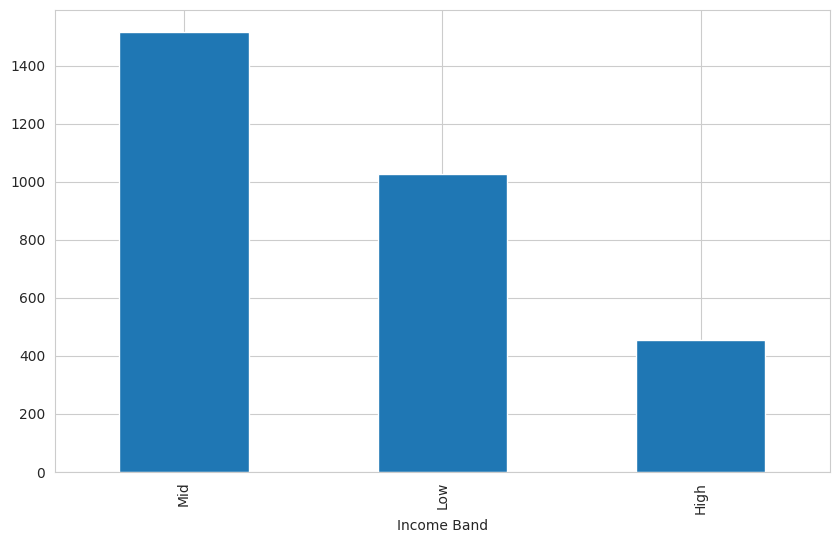

In [13]:
df['Income Band'].value_counts().plot(kind='bar')

## **UNIVARIATE ANALYSIS**

In [ ]:
# Examine the distribution of unique categories in categorical columns
categorical_cols = df[["BRId", "GenderId", "IAId", "Amount of Credit Cards", "Nationality", "Occupation", "Fee Structure", "Loyalty Classification", "Properties Owned", "Risk Weighting", "Income Band"]].columns

for col in categorical_cols:
    # if col in ["Cliet ID", "Name", "Joined Bank"]
    #   continue
    print(f"\nValue Counts for '{col}':")
    print(df[col].value_counts())


Value Counts for 'BRId':
BRId
3    1352
1     660
2     495
4     493
Name: count, dtype: int64

Value Counts for 'GenderId':
GenderId
2    1512
1    1488
Name: count, dtype: int64

Value Counts for 'IAId':
IAId
1     177
2     177
3     177
4     177
8     177
9     176
13    176
12    176
10    176
11    176
14    176
15    176
6      89
5      89
7      89
16     88
17     88
18     88
19     88
20     88
21     88
22     88
Name: count, dtype: int64

Value Counts for 'Amount of Credit Cards':
Amount of Credit Cards
1    1922
2     765
3     313
Name: count, dtype: int64

Value Counts for 'Nationality':
Nationality
European      1309
Asian          754
American       507
Australian     254
African        176
Name: count, dtype: int64

Value Counts for 'Occupation':
Occupation
Associate Professor             28
Structural Analysis Engineer    28
Recruiter                       25
Account Coordinator             24
Human Resources Manager         24
                                ..

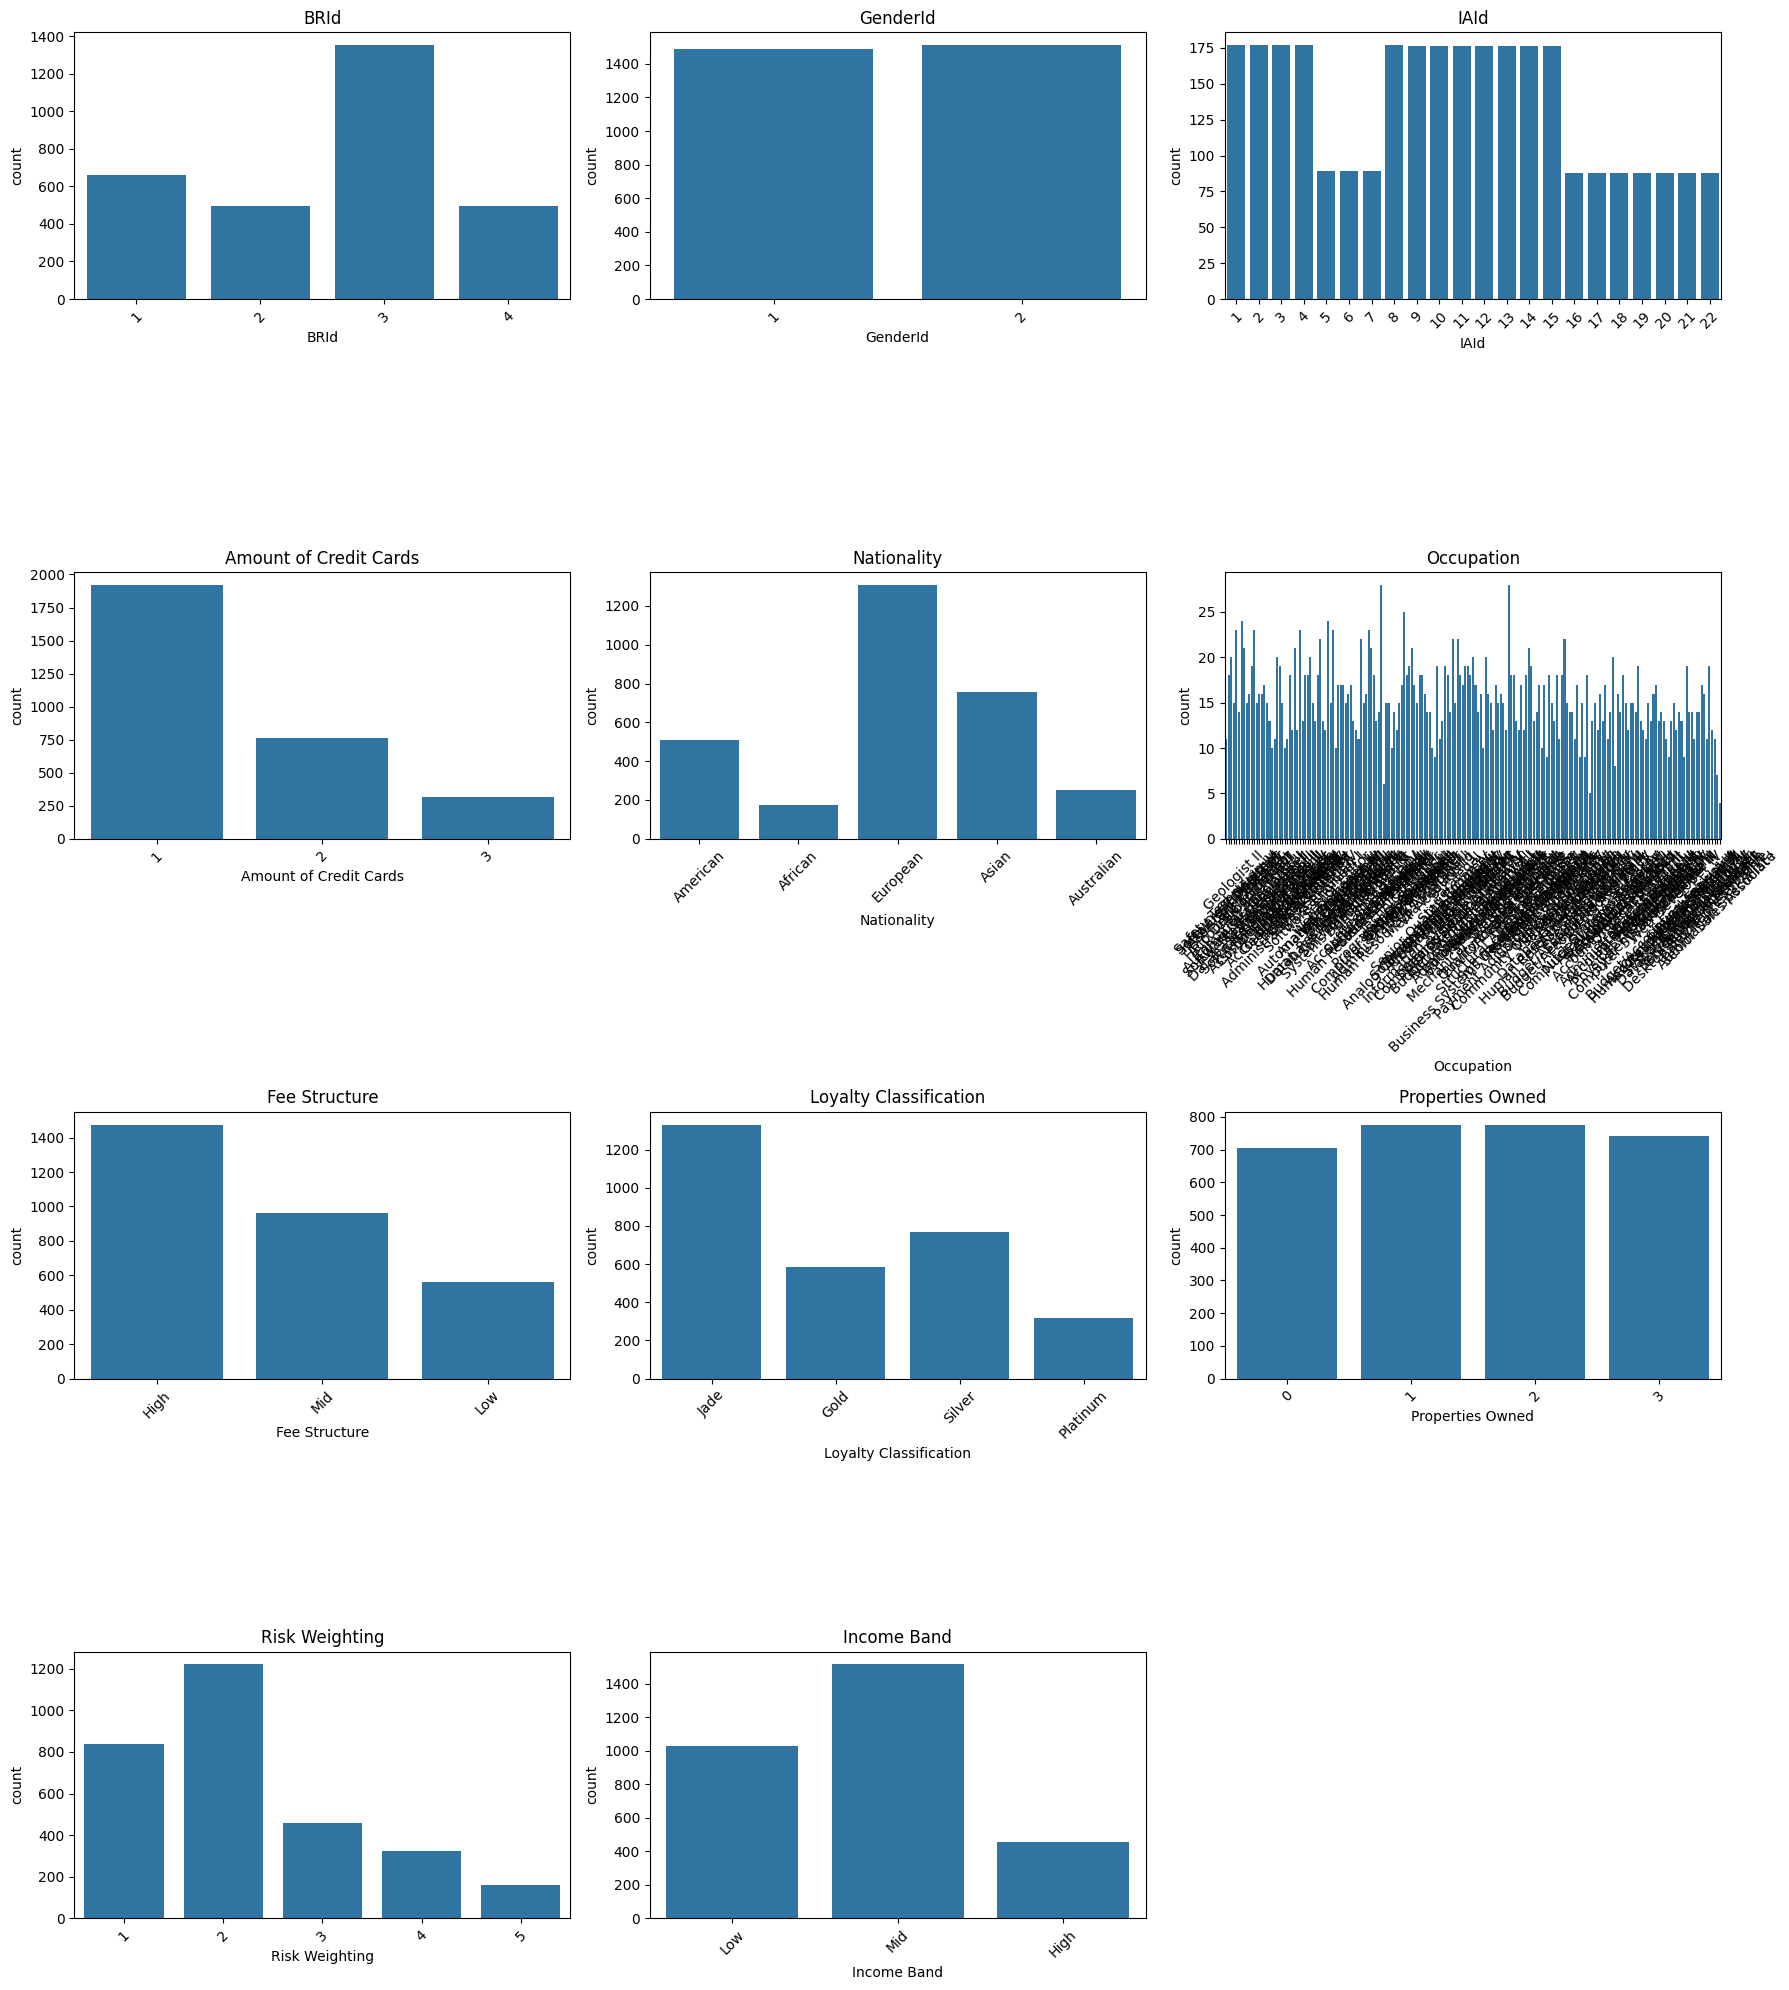

In [ ]:
# Define the predictors
predictors = [
    "BRId", "GenderId", "IAId", "Amount of Credit Cards", "Nationality",
    "Occupation", "Fee Structure", "Loyalty Classification",
    "Properties Owned", "Risk Weighting", "Income Band"
]

# Define subplot grid (e.g., 4 rows × 3 columns)
rows = 4
cols = 3

# Create figure and axes
fig, axes = plt.subplots(rows, cols, figsize=(18, 20))
axes = axes.flatten()  # Flatten 2D array of axes to 1D

# Plot each predictor
for i, predictor in enumerate(predictors):
    sns.countplot(data=df, x=predictor, ax=axes[i])
    axes[i].set_title(predictor, fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

# Hide any extra subplots (if total < rows*cols)
for j in range(len(predictors), rows * cols):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


## **BIVARIATE ANALYSIS**

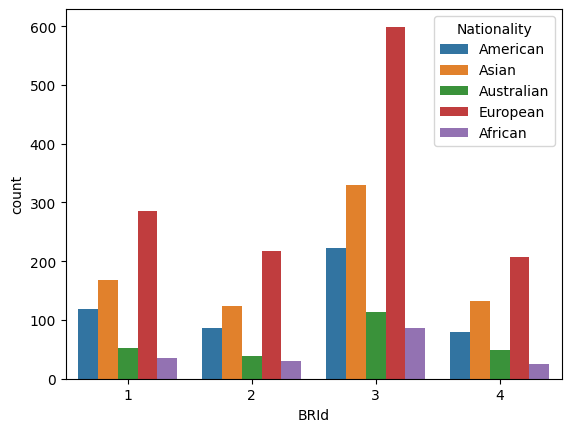

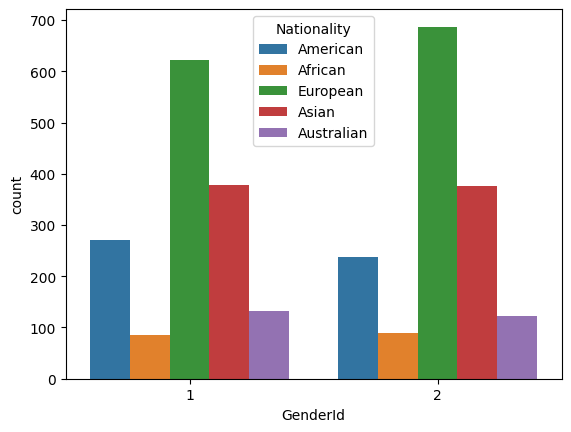

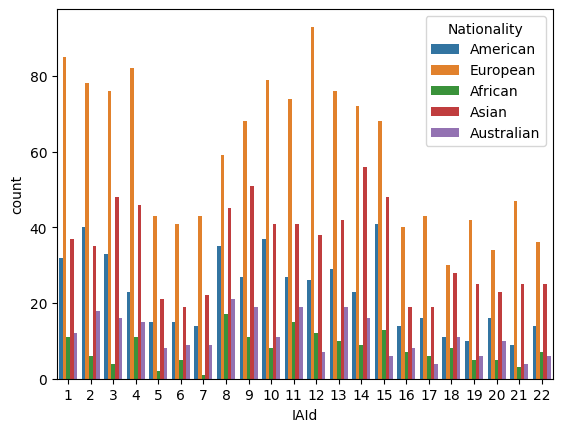

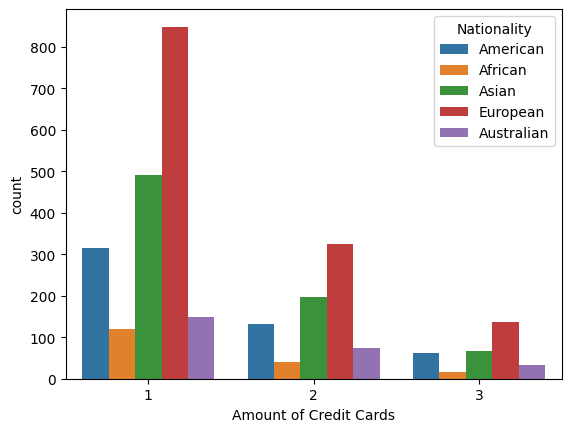

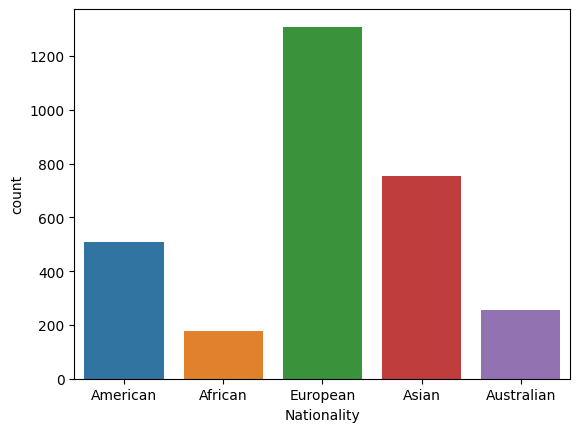

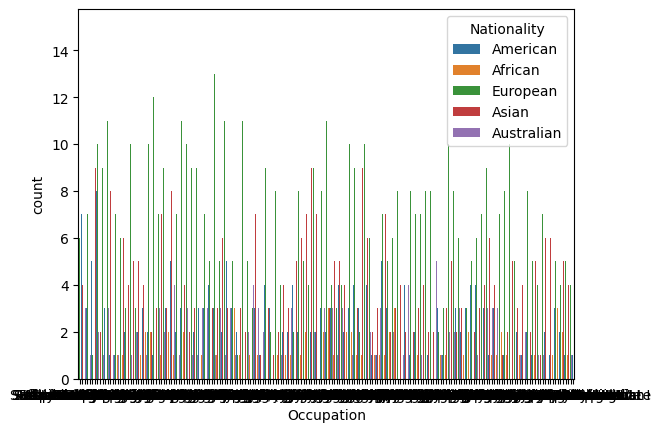

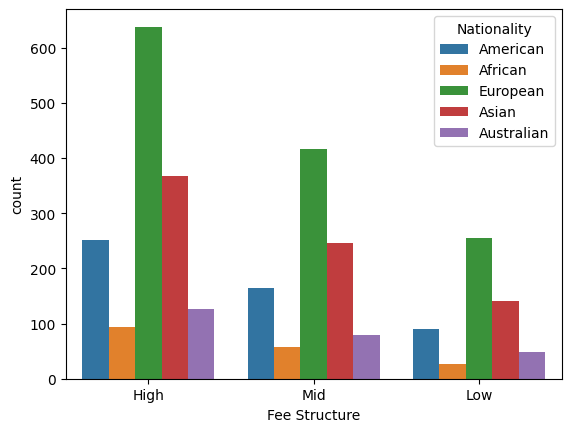

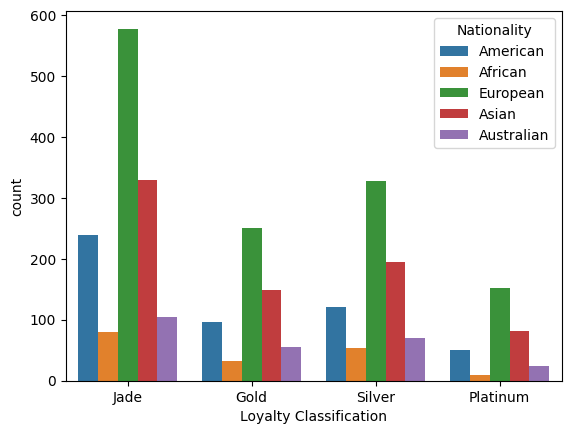

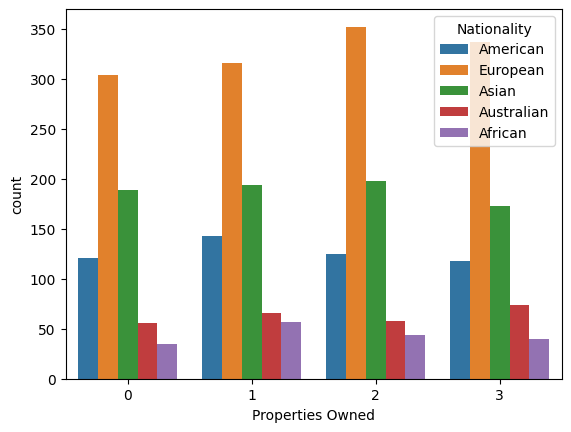

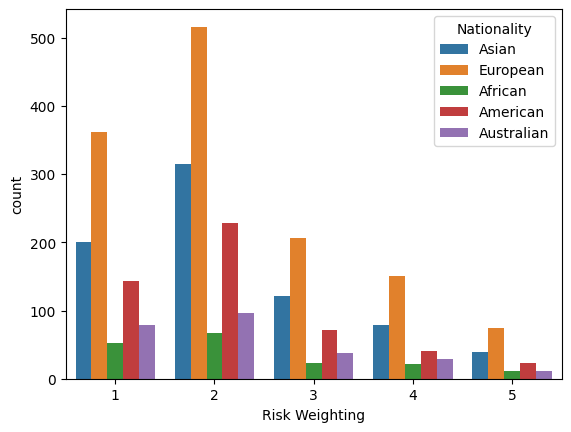

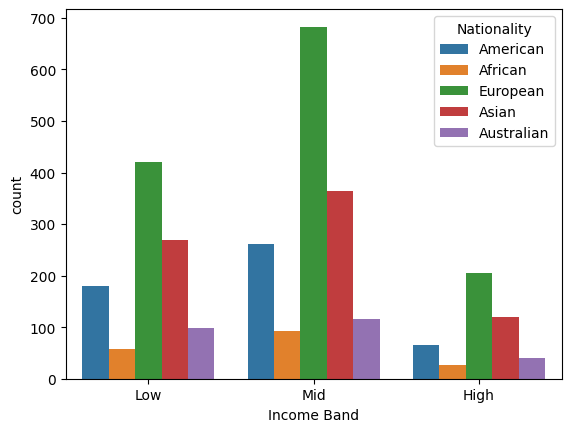

In [ ]:
# Examine the distribution of unique categories in categorical columns using Plots with respect to Gender

for i, predictor in enumerate(categorical_cols):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Nationality')

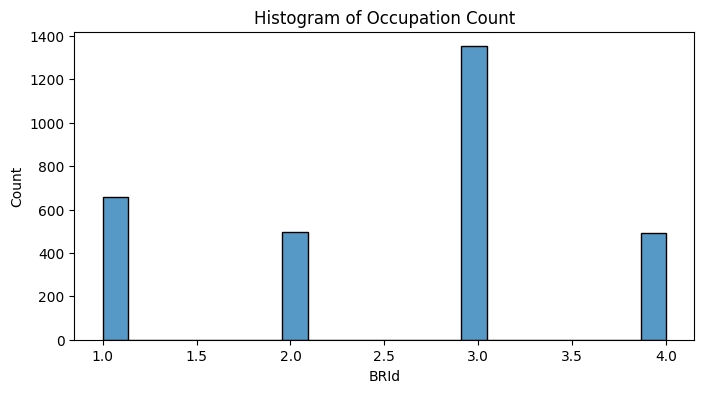

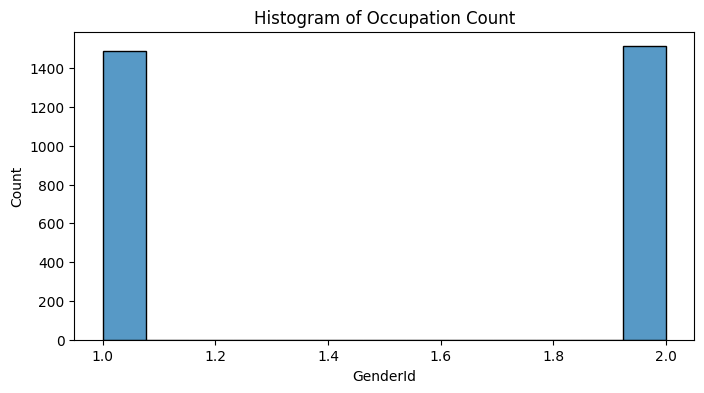

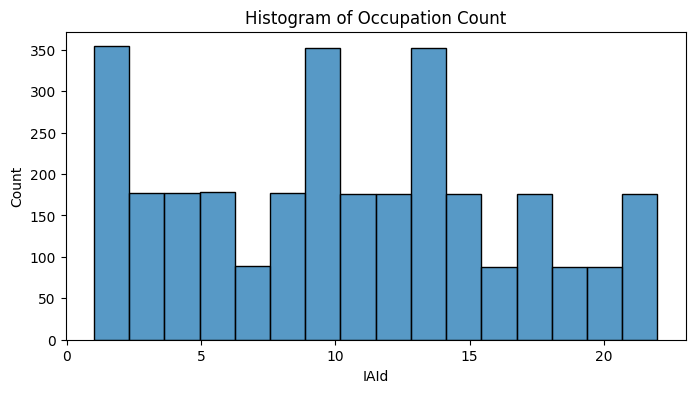

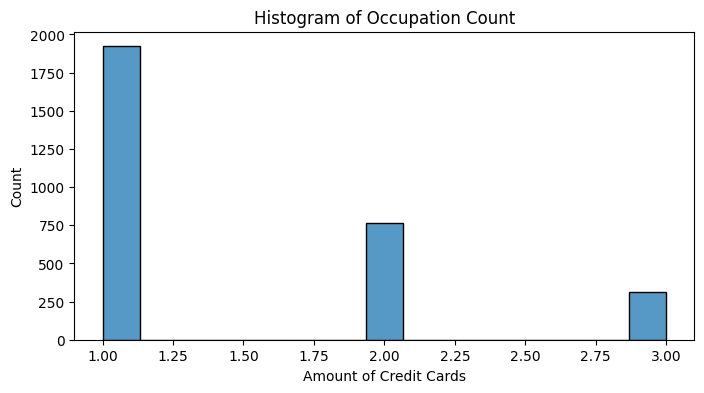

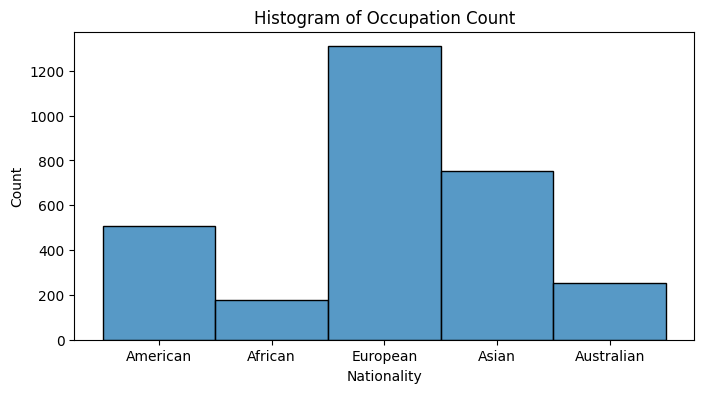

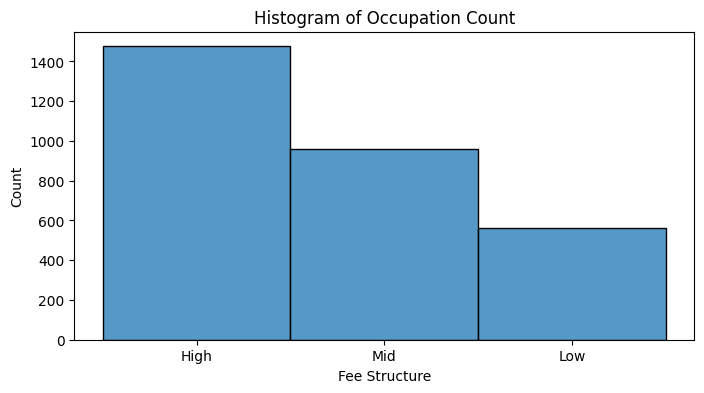

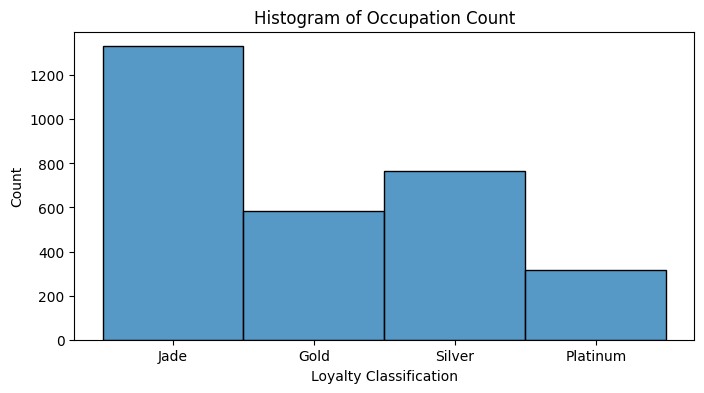

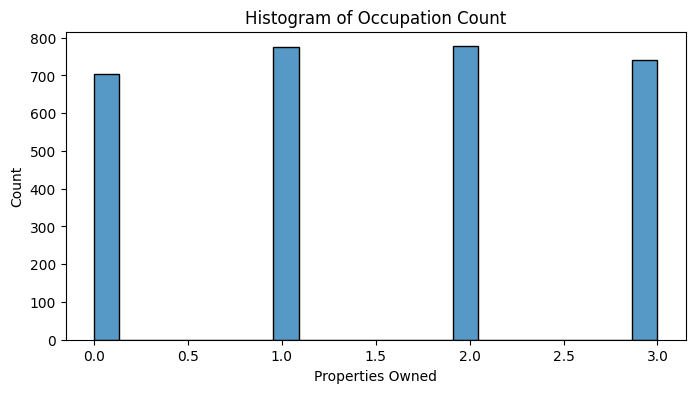

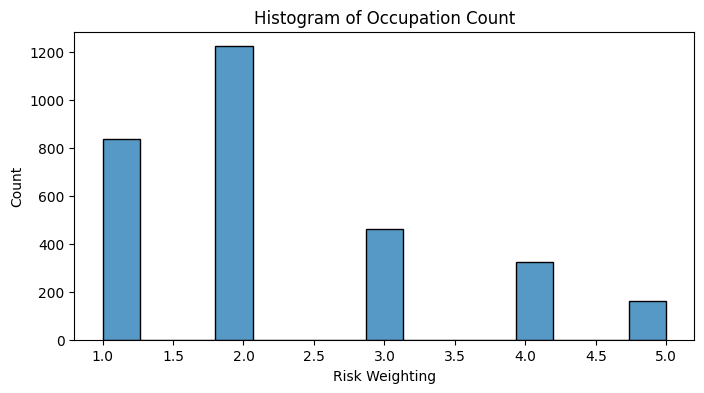

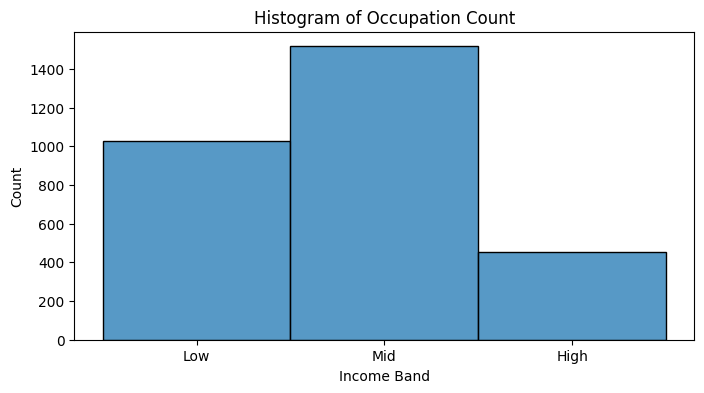

In [ ]:
# Histplot of value counts for different Occupation

for col in categorical_cols:
    if col == "Occupation":
      continue
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col])
    plt.title("Histogram of Occupation Count")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

## **NUMERICAL ANALYSIS**

In [ ]:
# Generate descriptive statistics for numerical columns
print("\nDescriptive Statistics for Numerical Columns:")
display(df.describe())


Descriptive Statistics for Numerical Columns:


,Age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Client ID                   0
Name                        0
Age                         0
Location ID                 0
Joined Bank                 0
Banking Contact             0
Nationality                 0
Occupation                  0
Fee Structure               0
Loyalty Classification      0
Estimated Income            0
Superannuation Savings      0
Amount of Credit Cards      0
Credit Card Balance         0
Bank Loans                  0
Bank Deposits               0
Checking Accounts           0
Saving Accounts             0
Foreign Currency Account    0
Business Lending            0
Properties Owned            0
Risk Weighting              0
BRId                        0
GenderId                    0
IAId                        0
Income Band                 0
dtype: int64


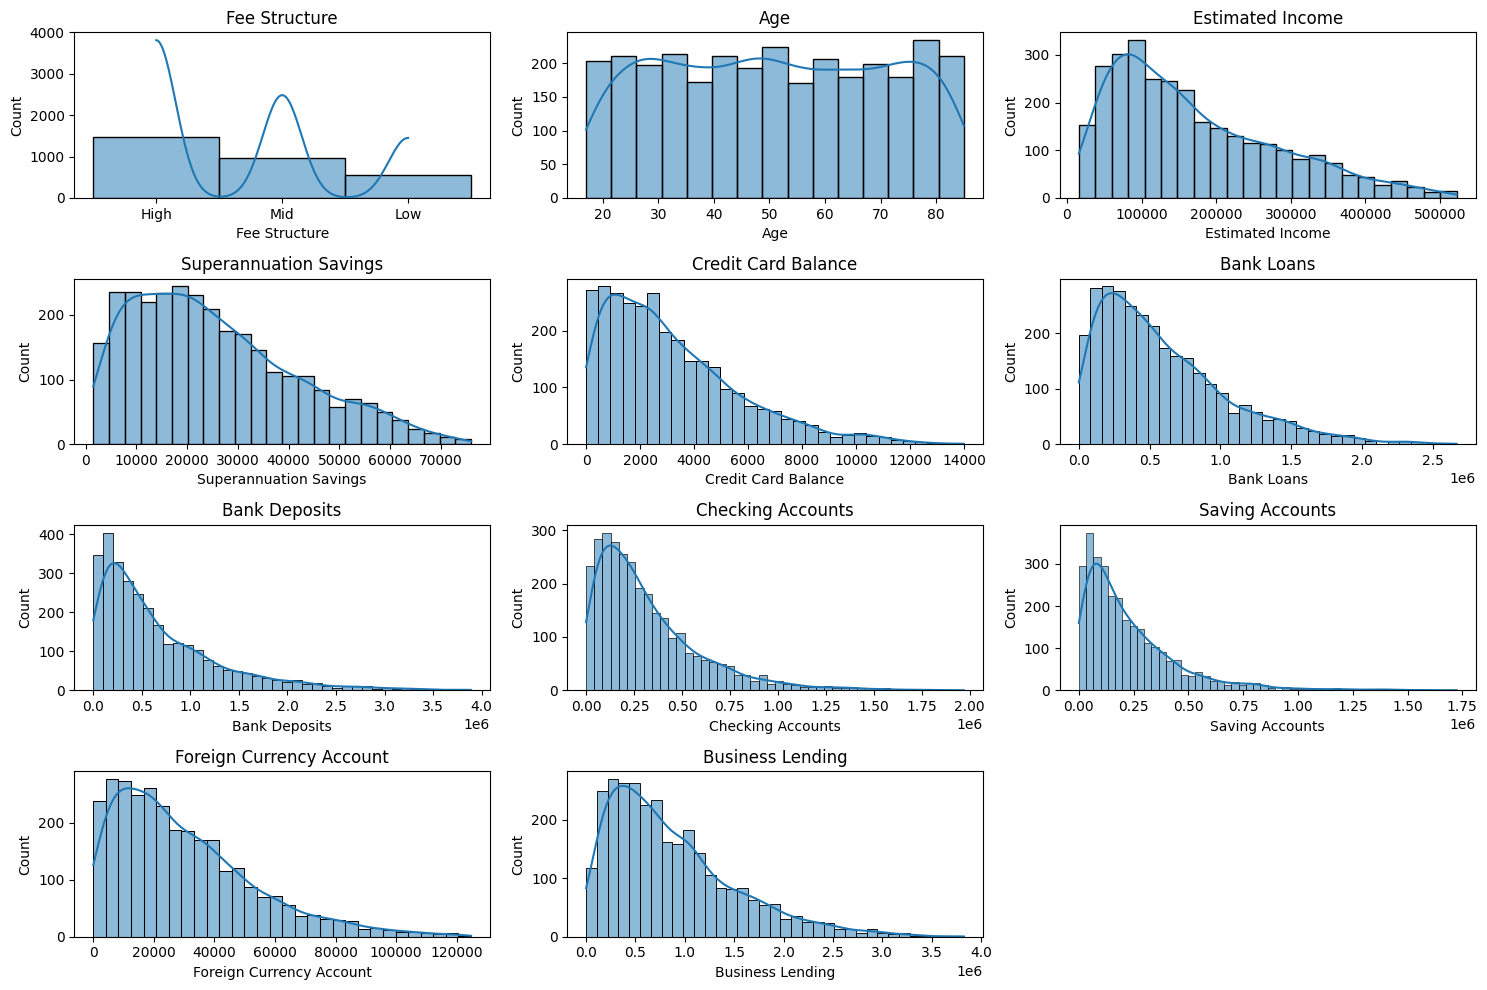

In [ ]:
numerical_cols = ['Fee Structure','Age', 'Estimated Income', 'Superannuation Savings', 'Credit Card Balance', 'Bank Loans', 'Bank Deposits', 'Checking Accounts', 'Saving Accounts', 'Foreign Currency Account', 'Business Lending']

# Univariate analysis and visualization
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


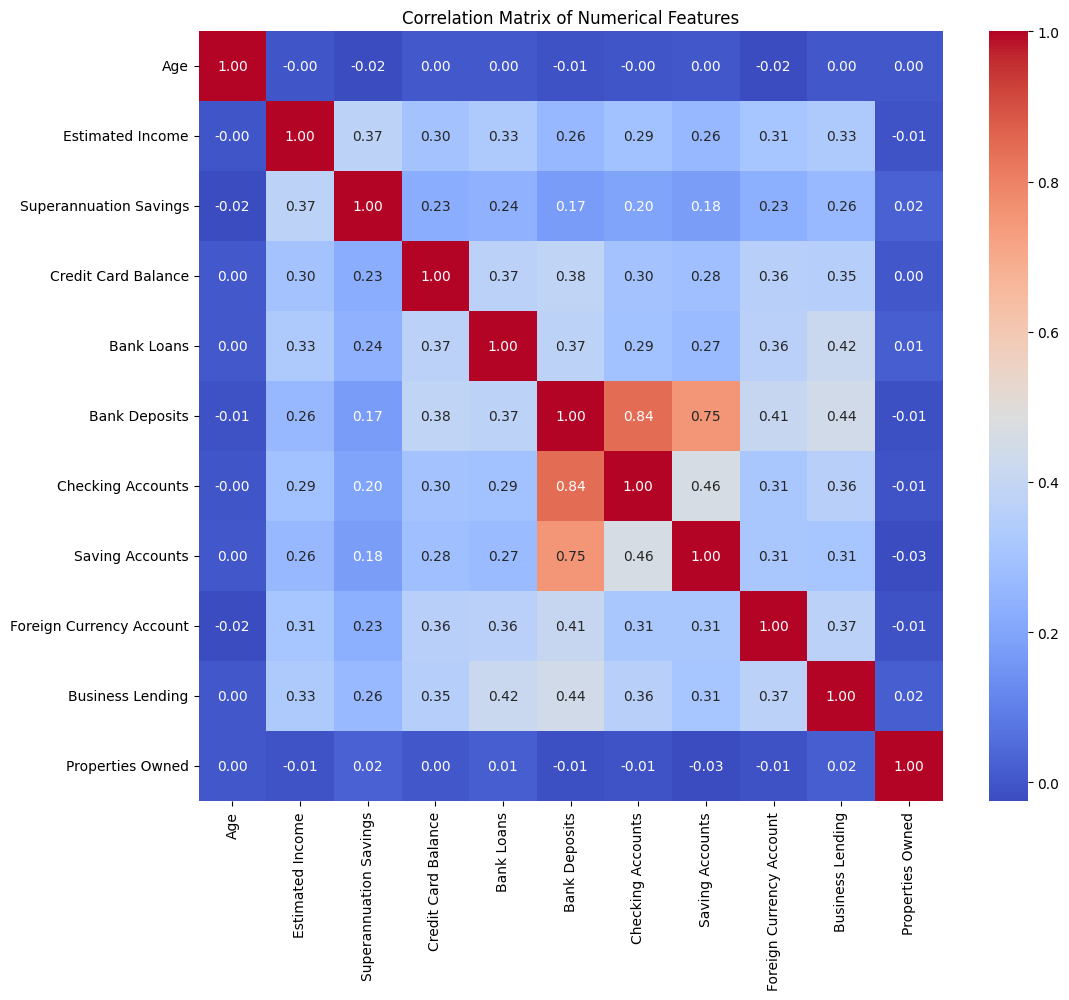

In [ ]:
# Select numerical columns for correlation analysis
numerical_cols = ['Age', 'Estimated Income', 'Superannuation Savings', 'Credit Card Balance',
                  'Bank Loans', 'Bank Deposits', 'Checking Accounts', 'Saving Accounts',
                  'Foreign Currency Account', 'Business Lending', 'Properties Owned']

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

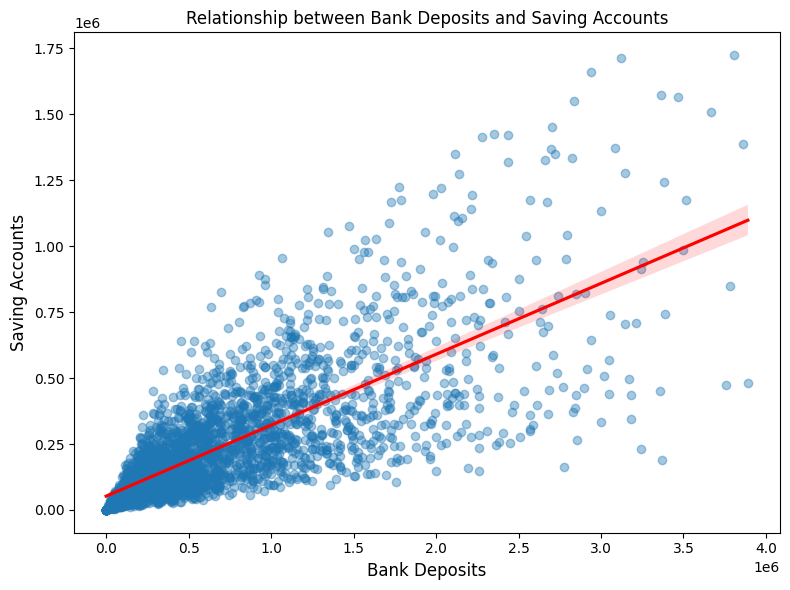

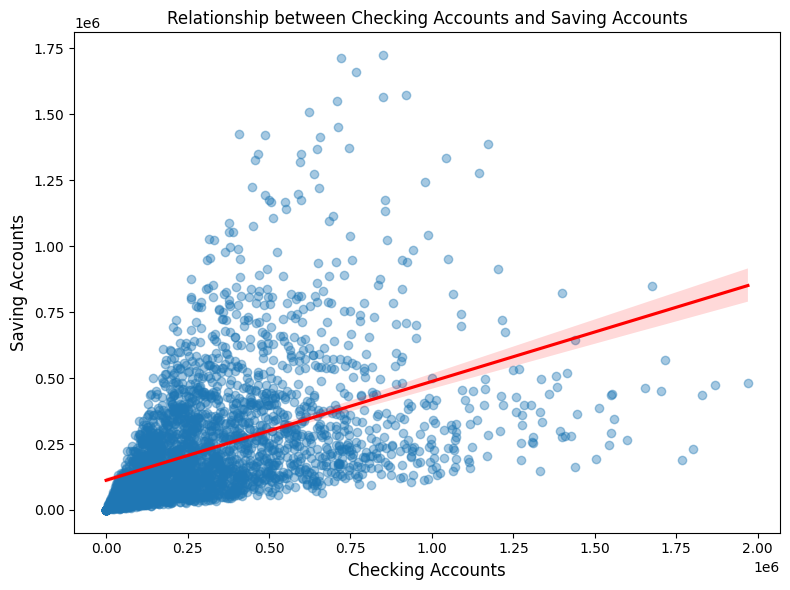

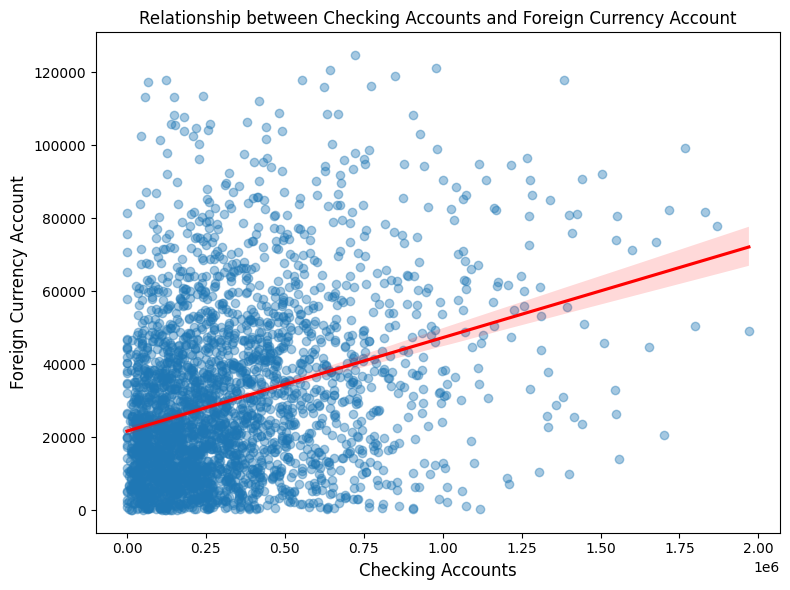

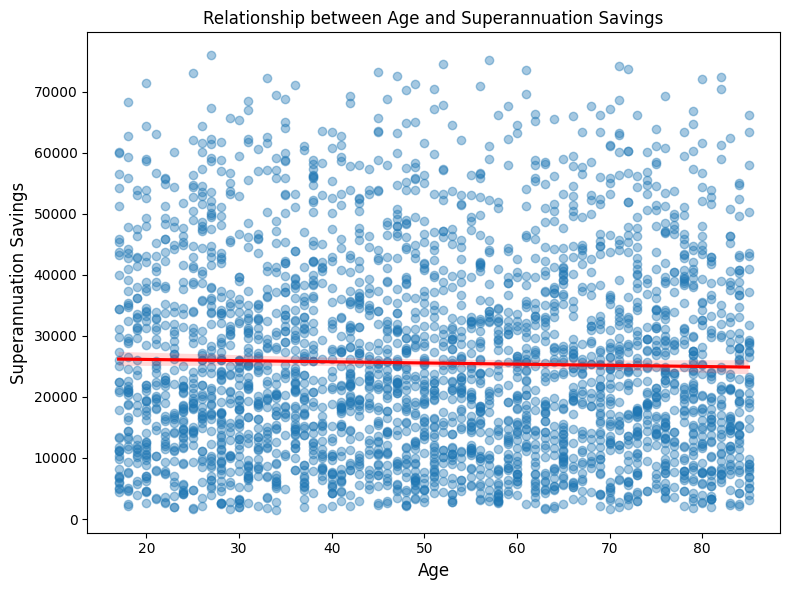

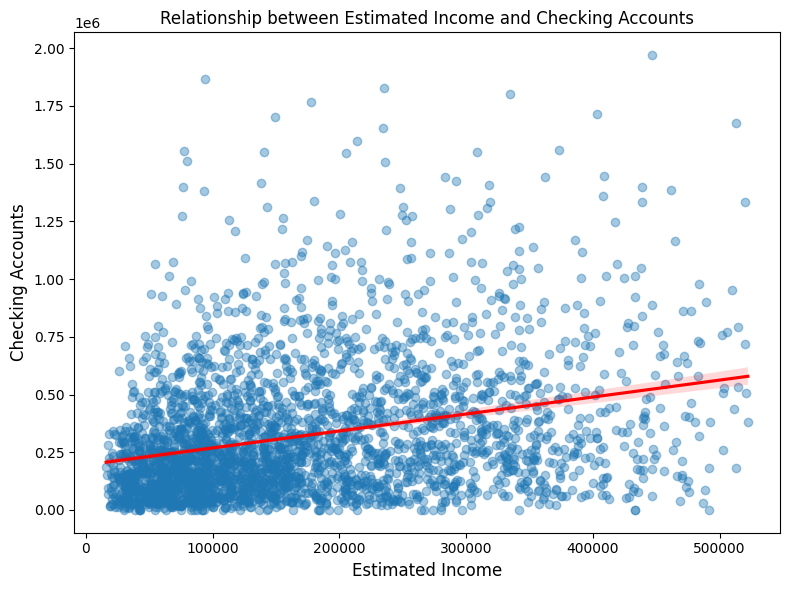

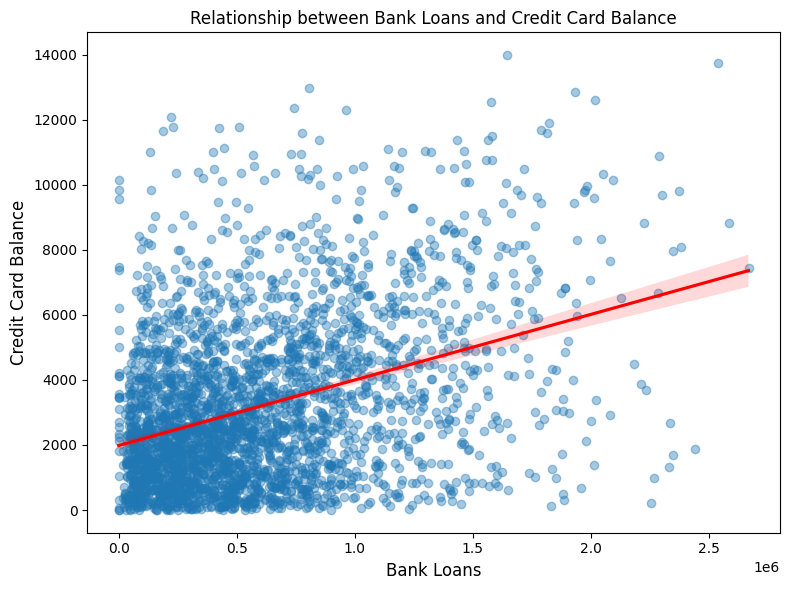

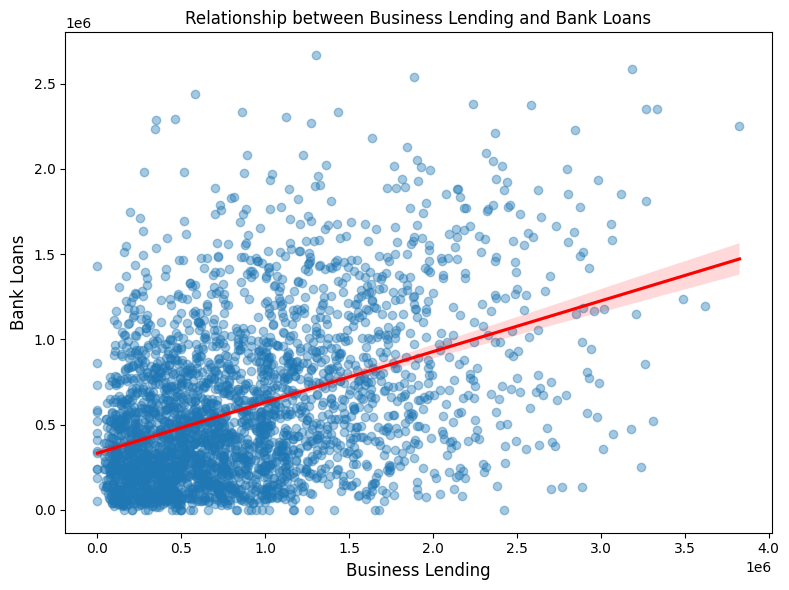

In [ ]:
pairs_to_plot = [
    ('Bank Deposits', 'Saving Accounts'),
    ('Checking Accounts', 'Saving Accounts'),
    ('Checking Accounts', 'Foreign Currency Account'),
    ('Age', 'Superannuation Savings'),
    ('Estimated Income', 'Checking Accounts'),
    ('Bank Loans', 'Credit Card Balance'),
    ('Business Lending', 'Bank Loans')
]

for x_col, y_col in pairs_to_plot:
    plt.figure(figsize=(8, 6))
    sns.regplot(
        data=df,
        x=x_col,
        y=y_col,
        scatter_kws={'alpha': 0.4},   # semi-transparent points
        line_kws={'color': 'red'}     #best-fit line color
    )
    plt.title(f'Relationship between {x_col} and {y_col}')
    plt.xlabel(x_col, fontsize=12)
    plt.ylabel(y_col, fontsize=12)
    plt.tight_layout()
    plt.show()